Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [605]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

Mais alguns materiais de apoio:
+    https://jupyterhub.namd.mat.br/user/cristiananc/notebooks/FGV_Programming_Languages/Python/Notebooks/Regular%20expressions.ipynb

+ https://jupyterhub.namd.mat.br/user/cristiananc/notebooks/FGV_Programming_Languages/Python/Exercicios/Exercicios_text_operations.ipynb

+ 
https://jupyterhub.namd.mat.br/user/cristiananc/notebooks/FGV_Programming_Languages/Python/Exercicios/limpeza_texto.ipynb

+ 
https://github.com/Cristiananc/FGV_Programming_Languages/blob/master/Python/Exercicios/Avaliacoes/Prova_A1_2018.ipynb

+ https://docs.python.org/2/library/re.html

+ https://jupyterhub.namd.mat.br/user/cristiananc/notebooks/FGV_Programming_Languages/Python/Exercicios/Avaliacoes/Quizz_comprehensions-Copy1.ipynb

+ 
https://jupyterhub.namd.mat.br/user/cristiananc/notebooks/FGV_Programming_Languages/Python/Exercicios/Exercicios_Revisao-Copy1.ipynb

Referências usadas na prova:
    
+ https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

+ https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [718]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)


In [221]:
df_zoo[['animal']].head()

,animal
0,aardvark
1,antelope
2,bass
3,bear
4,boar


2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://stackoverflow.com/questions/49259580/replace-values-in-a-pandas-series-via-dictionary-efficiently)

In [147]:
type(df_zoo)

pandas.core.frame.DataFrame

In [175]:
df_zoo.info()
#Retorna o tipo do dado nas colunas, dentre outras informacoes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [242]:
def ft(x):
    if x==True:
        x='Verdadeiro'
    elif x==False:
        x= 'Falso'
    else:
        x=x
        return(x)

In [246]:
df_zoo.applymap(lambda x: ft(x)).head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,None,None,None,None,None,None,None,None,None,None,None,None,4.0,None,None,None,mammal
1,antelope,None,None,None,None,None,None,None,None,None,None,None,None,4.0,None,None,None,mammal
2,bass,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,fish
3,bear,None,None,None,None,None,None,None,None,None,None,None,None,4.0,None,None,None,mammal
4,boar,None,None,None,None,None,None,None,None,None,None,None,None,4.0,None,None,None,mammal


In [183]:
df_zoo1 = df_zoo.copy()

In [227]:
df_zoo1.replace(True,'Verdadeiro',inplace=True)
df_zoo1.replace(False,'Falso',inplace=True) #nesse caso ele considera 1 e 0 como false e true
df_zoo1.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
1,antelope,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
2,bass,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Verdadeiro,Falso,Falso,fish
3,bear,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
4,boar,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal


3 - Crie um novo dataframe somente com os Mamíferos

In [205]:
df_zoo_filtrado = df_zoo[df_zoo.type == 'mammal']
df_zoo_filtrado.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

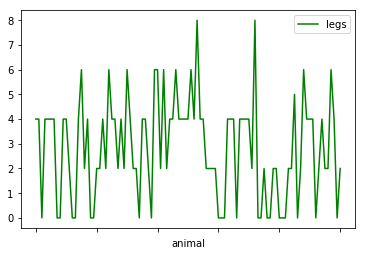

In [220]:
df_zoo.plot(x = 'animal', y = 'legs', color='g')

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [ ]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')

In [251]:
#Abaixo o passo a passo para a criação de uma tabela no sql a patir de um dataframe
conn = sqlite3.connect('tabela_zoo')

In [248]:
df_zoo.to_sql('tabela_zoo', con=conn)

In [249]:
cur = conn.cursor()

In [250]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [253]:
#Transformando uma tabela do sql em um dataframe
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", conn)
new_df.head(6)

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
5,5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

In [316]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | sed 50q



















































cat: write error: Broken pipe


1 - Ordene as palavras do texto nas formas abaixo:
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [492]:
#Listando as palavras distintas num texto ordenadas pela ordem alfabética
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z]''[áàâãéêèíôóõúç]''[a-z]' '[\012*]' | sort | uniq | head


]
�
a
A
á
ab
abafadas
abafado
abafando
uniq: write error: Broken pipe


In [540]:
#Trocando o nome de Capitú por Cristiana
!cat ../Dados/DomCasmurroMachadoAssis.txt |sed 's/Capitú/Cristiana/g' |head











sed: couldn't write 72 items to stdout: Broken pipe
cat: write error: Broken pipe


In [462]:
#Transformando todas as letras em maísculas
! tr '[a-z]' '[A-Z]' <  ../Dados/DomCasmurroMachadoAssis.txt |tr -sc '[A-Z]' '[\012*]' |sort | uniq -c | sort -f | head

      1 
      1 ]
    101 ENT
   1034 ME
    105 ERAM
    107 OUTRO
     10 ABRA
     10 ACCESS
     10 ACHA
     10 AP
sort: write failed: 'standard output': Broken pipe
sort: write error


In [480]:
#Encontrando a frequência de sequências de vogais
! tr '[A-Z]' '[a-z]' <  ../Dados/DomCasmurroMachadoAssis.txt |tr -sc 'aeiou' '[\012*]' |sort | uniq -c |head 

      1 
  34325 a
      1 aa
    245 ae
    748 ai
     28 aia
     46 aio
      1 aiou
     27 aiu
    478 ao


In [507]:
#Ordem ascii
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z]''[áàâãéêèíôóõúç]''[a-z]' '[\012*]' | LC_ALL=C sort |uniq | sed 20q


A
ACADEMIA
ACTUAL
AGREE
AGREEMENT
AK
AND
ANY
ANYTHING
AS
ASCII
ASSIS
Abaixo
Abane
Abel
About
Abrahão
Abre
Abri
uniq: write error: Broken pipe


In [721]:
#Ordem de rima
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z]''[a-z]' '[\012*]' |sort |uniq | rev | sort | rev | head 


]
a
A
acaba
saiba
amba
emba
barba
Corityba


2 - Quantas palavras maiúsculas distintas há no texto?

In [417]:
#Frequência de palavras em maísculo
! tr -sc '[A-Z][áàâãéêèíôóõúç][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt |sort | grep '^[A-Z]' |uniq -c | sort -nr |sed 15q 

    345 Capitú
    315 Não
    257 A
    184 O
    160 José
    152 Dias
    144 E
    111 Escobar
    101 Mas
     86 Era
     84 Gutenberg
     70 Deus
     69 Eu
     57 Bentinho
     55 Justina
sort: write failed: 'standard output': Broken pipe
sort: write error


In [704]:
#Quantidade de palavras distintas em maísculo
! tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt |sort | grep '^[A-ZÁÀÃÂÉÊÍÓÔÚÇ]' |uniq | wc -l 

972
sort: write failed: 'standard output': Broken pipe
sort: write error


3 - Quantas palavras há com apenas uma, com apenas duas, e com apenas 3 vogais?

In [ ]:
#Palavras com apenas uma vogal

!tr -sc '[A-Z][áàâãéêèíôóõúç][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep -i '^[^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú]\{1\}[^aeiouáàâãéêèíôóõú]*$' | sort -f | wc -l

In [455]:
#Palavras com apenas duas vogais
!tr -sc '[A-Z][áàâãéêèíôóõúç][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep -i '^[^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú][^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú]$' | sort -f |wc -l  

18180


In [460]:
#Palavras com apenas três vogais
!tr -sc '[A-Z][áàâãéêèíôóõúç][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep -i '^[^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú][^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú][^aeiouáàâãéêèíôóõú]*[aeiouáàâãéêèíôóõú]$' | sort -f | wc -l  

9391


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [376]:
#Comando para encontrar os bigramas incluindo acentuação
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][áàâãéêèíôóõúç][a-z]' '[\012*]' > ../Dados/DomCasmurro.words
! tail -n+2 ../Dados/DomCasmurro.words > ../Dados/DomCasmurro.nextwords

In [377]:
#Colocar as palavras num mesmo arquivo juntas e contar os bigramas
!paste ../Dados/DomCasmurro.words ../Dados/DomCasmurro.nextwords | sort | uniq -c > ../Dados/DomCasmurro.bigrams

In [378]:
! cat ../Dados/DomCasmurro.bigrams | sort -nr | head

    187 que	não
    173 que	me
    163 é	que
    155 o	que
    151 José	Dias
    137 que	eu
    134 minha	mãe
    128 que	a
    117 que	o
    107 e	o
sort: write failed: 'standard output': Broken pipe
sort: write error


### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando Python

In [541]:
import string

1 - Ordene as palavras do texto nas formas abaixo:

+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [692]:
# Ordem alfabética
with  open('../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding ='utf-8') as f:
    texto = f.read()
texto = [p.strip(string.punctuation) for p in texto.split()]
texto = [i for i in texto if not i[0:1].isdigit()]
#texto = [p.lower() for p in texto]
abc = list(set(texto))
abcd = sorted(abc)

In [689]:
# Ordem ascii
asci = sorted(abc, key = ascii)

In [690]:
#Ordem de rima
rev = [i[-1::-1] for i in texto]
rev = list(set(rev))
a = sorted(rev)
a = [i[-1::-1] for i in a]

#Escrevo num arquivo o resultado
with open('revrima.txt', 'w') as f:
    for item in a:
        f.write("%s\n" % item)

Removendo números de uma string

+ Fonte : https://stackoverflow.com/questions/12851791/removing-numbers-from-string

In [649]:
exemplo = 'Cristiana'
exemplo[:]
exemplo[-1::-1]

'anaitsirC'

2 - Quantas palavras maiúsculas distintas há no texto?

In [720]:
maiusculas = [p for p in texto if p.istitle()] #Observar se essa é a melhor forma
maiusculas = list(set(maiusculas))
count = 0
for m in maiusculas:
    count = count + 1
print(count)

#Opção de contagem mais simples
print(len(maiusculas))

1230
1230


In [714]:
#Contagem de vogais



### Parte 4 - Bancos de dados

In [530]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [531]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [532]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [533]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [534]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [535]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [536]:

cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [537]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [18]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [19]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [35]:
sqlcomando= " " " select max(avail_balance), min(avail_balance), avg(avail_balance) from account;" " "
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(50000.0, 0.0, 7114.769138)


2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [36]:
sqlcomando = "" " select * from account where avail_balance > (select avg(avail_balance) from account) """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(24, 'CHK', 10, datetime.date(2002, 9, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 23575.12, 23575.12)
(27, 'BUS', 11, datetime.date(2004, 3, 22), None, datetime.date(2004, 11, 14), 'ACTIVE', 2, 10, 9345.55, 9345.55)
(28, 'CHK', 12, datetime.date(2003, 7, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 38552.05, 38552.05)
(29, 'SBL', 13, datetime.date(2004, 2, 22), None, datetime.date(2004, 12, 17), 'ACTIVE', 3, 13, 50000.0, 50000.0)


3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [37]:
sqlcomando = """ (select * from account order by open_date limit 3)
UNION ALL
(select * from account order by open_date desc limit 3);"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(11, 'SAV', 4, datetime.date(2000, 1, 15), None, datetime.date(2004, 10, 24), 'ACTIVE', 1, 1, 767.77, 767.77)
(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(12, 'MM', 4, datetime.date(2004, 9, 30), None, datetime.date(2004, 11, 11), 'ACTIVE', 1, 1, 5487.09, 5487.09)


4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [10]:
sqlcomando = """ select * from product
join product_type as p
on product.product_type_cd = p.product_type_cd"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None, 'LOAN', 'Individual and Business Loans')
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None, 'LOAN', 'Individual and Business Loans')
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'ACCOUNT', 'Customer Accounts')
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'ACCOUNT', 'Customer Accounts')
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'ACCOUNT', 'Customer Accounts')
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None, 'LOAN', 'Individual and Business Loans')
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'ACCOUNT', 'Customer Accounts')
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None, 'LOAN', 'Individual and Business Loans')


In [5]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


5 - Quantos empregados ("employee") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [20]:
sqlcomando = """ select * from employee where fname like '%e%' """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(16, 'Theresa', 'Markham', datetime.date(2001, 3, 15), None, 4, 1, 'Head Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)


In [23]:
sqlcomando = """ select * from employee where lname like '%r' """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(11, 'Thomas', 'Ziegler', datetime.date(2000, 10, 23), None, 10, 1, 'Teller', 2)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)


In [15]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

In [28]:
sqlcomando = """ select distinct title from employee """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [32]:
sqlcomando = """ select * from employee WHERE title = 'Operations Manager' """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


In [38]:
#Outro jeito de fazer, menos na mão
sqlcomando = """ select * from employee WHERE superior_emp_id IN (SELECT emp_id FROM employee WHERE superior_emp_id = 1) """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [39]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [40]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [538]:
sqlcomando = """ 
SELECT product_cd, AVG(avail_balance), MIN(avail_balance), max(avail_balance) FROM account GROUP BY product_cd
"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('BUS', 4672.774902, 0.0, 9345.55)
('CD', 4875.0, 1500.0, 10000.0)
('CHK', 7300.800985, 122.37, 38552.05)
('MM', 5681.713216, 2212.5, 9345.55)
('SAV', 463.940002, 200.0, 767.77)
('SBL', 50000.0, 50000.0, 50000.0)


9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [539]:
sqlcomando = """ 
SELECT count(*), year(txn_date) FROM transaction
group by year(txn_date)

"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(3, 2000)
(4, 2001)
(4, 2002)
(3, 2003)
(7, 2004)


In [50]:
cur.execute('describe transaction;')
for r in cur.fetchall():
    print(r)

('txn_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('txn_date', 'datetime', 'NO', '', None, '')
('account_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('txn_type_cd', "enum('DBT','CDT')", 'YES', '', None, '')
('amount', 'double(10,2)', 'NO', '', None, '')
('teller_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('execution_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('funds_avail_date', 'datetime', 'YES', '', None, '')


10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [59]:
#Comando de criar tabelas foi negado

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [61]:
cur.execute('describe individual;')
for r in cur.fetchall():
    print(r)

('cust_id', 'int(10) unsigned', 'NO', 'PRI', None, '')
('fname', 'varchar(30)', 'NO', '', None, '')
('lname', 'varchar(30)', 'NO', '', None, '')
('birth_date', 'date', 'YES', '', None, '')


In [68]:
cur.execute('select * from individual;')
for r in cur.fetchall():
    print(r)


(1, 'James', 'Hadley', datetime.date(1972, 4, 22))
(2, 'Susan', 'Tingley', datetime.date(1968, 8, 15))
(3, 'Frank', 'Tucker', datetime.date(1958, 2, 6))
(4, 'John', 'Hayward', datetime.date(1966, 12, 22))
(5, 'Charles', 'Frasier', datetime.date(1971, 8, 25))
(6, 'John', 'Spencer', datetime.date(1962, 9, 14))
(7, 'Margaret', 'Young', datetime.date(1947, 3, 19))
(8, 'Louis', 'Blake', datetime.date(1977, 7, 1))
(9, 'Richard', 'Farley', datetime.date(1968, 6, 16))


In [78]:
sqlcomando = """ 
SELECT fname,lname FROM individual

"""
cur.execute(sqlcomando)

result = cur.fetchall() 

final_result = [list(i) for i in result]

print(final_result)

[['James', 'Hadley'], ['Susan', 'Tingley'], ['Frank', 'Tucker'], ['John', 'Hayward'], ['Charles', 'Frasier'], ['John', 'Spencer'], ['Margaret', 'Young'], ['Louis', 'Blake'], ['Richard', 'Farley']]


In [106]:
sqlcomando = """ 
select concat(individual.fname, ' ', i.lname)
  from individual
    inner join individual as i
      on individual.cust_id = i.cust_id
"""

cur.execute(sqlcomando)

result = cur.fetchall() 

final_result = [list(i) for i in result]

print(final_result)

[['James Hadley'], ['Susan Tingley'], ['Frank Tucker'], ['John Hayward'], ['Charles Frasier'], ['John Spencer'], ['Margaret Young'], ['Louis Blake'], ['Richard Farley']]


In [129]:
sqlcomando = """ 
select concat(individual.fname, ' ', i.lname)
  from individual
    inner join individual as i
      on individual.cust_id = i.cust_id
"""

cur.execute(sqlcomando)
a = []
for i in cur.fetchall() :
        a.append('{}'.format(i[0]))
print(a)

['James Hadley', 'Susan Tingley', 'Frank Tucker', 'John Hayward', 'Charles Frasier', 'John Spencer', 'Margaret Young', 'Louis Blake', 'Richard Farley']


In [103]:
q1 = '''select fname, lname from individual;'''
l = []

cur.execute(q1)
for r in cur.fetchall():
    l.append('{} {}'.format(r[0],r[1]))
print(l)

['James Hadley', 'Susan Tingley', 'Frank Tucker', 'John Hayward', 'Charles Frasier', 'John Spencer', 'Margaret Young', 'Louis Blake', 'Richard Farley']


12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [139]:
sqlcomando = """ 
select year(birth_date) from individual
"""

cur.execute(sqlcomando)
b = []
for i in cur.fetchall() :
        b.append('{}'.format(i[0]))
print(b)
   
print(a)

['1972', '1968', '1958', '1966', '1971', '1962', '1947', '1977', '1968']
['James Hadley', 'Susan Tingley', 'Frank Tucker', 'John Hayward', 'Charles Frasier', 'John Spencer', 'Margaret Young', 'Louis Blake', 'Richard Farley']


In [141]:
dict(zip(a, b)) #Criei um dicionario com o zip

{'Charles Frasier': '1971',
 'Frank Tucker': '1958',
 'James Hadley': '1972',
 'John Hayward': '1966',
 'John Spencer': '1962',
 'Louis Blake': '1977',
 'Margaret Young': '1947',
 'Richard Farley': '1968',
 'Susan Tingley': '1968'}

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [5]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()